In [1]:
from utils import *
# from matplotlib.ticker import MultipleLocator, ScalarFormatter, NullFormatter
import vice

# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (4, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
})

In [5]:
# Import data
# data_dir = 'C:\\Users\\dubay.11\\OneDrive - The Ohio State University\\Documents\\Docs\\First Year Project\\Data'
data_dir = '~/Documents/Data'
data = pd.read_csv(Path(data_dir) / 'dr17_cut_data.csv')
data

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,APOKASC2_AGE,APOKASC2_AGE_PERR,APOKASC2_AGE_MERR,APOKASC2_AV,APOKASC2_AV_ERR,APOKASC2_NOTE,APOK2_MASS,APOK2_MASS_ERR,APOK2_RADIUS,APOK2_RADIUS_ERR
0,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597,0.039,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
1,2M00000032+5737103,apo25m,N7789,none,0.001335,57.619530,116.065371,-4.564768,10.905,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
2,2M00000035-7323394,lco25m,SMC12,none,0.001467,-73.394287,307.939441,-43.230305,15.008,0.045,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
3,2M00000068+5710233,apo25m,N7789,none,0.002850,57.173164,115.977154,-5.002392,10.664,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
4,2M00000133+5721163,apo25m,NGC7789_btx,none,0.005558,57.354549,116.014776,-4.824917,13.261,0.029,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408656,2M23595867-7339039,lco25m,SMC12,none,359.994493,-73.651093,307.846602,-42.982597,15.671,0.069,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408657,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466,0.024,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408658,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
408659,2M23595949-7342592,lco25m,SMC12,none,359.997887,-73.716454,307.821174,-42.919934,15.924,0.094,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN


In [3]:
mw = vice.milkyway(name='milkyway', N=2e5, zone_width=1.0)
mw

vice.milkyway{
    name -----------> milkyway
    n_zones --------> 20
    n_stars --------> 1
    verbose --------> False
    simple ---------> False
    annuli ---------> [0, 1, 2, ... , 18, 19, 20]
    evolution ------> <function milkyway.default_evolution at 0x7fd6b2b94ca0>
    mode -----------> ifr
    elements -------> ('fe', 'sr', 'o')
    IMF ------------> kroupa
    mass_loading ---> <function milkyway.default_mass_loading at 0x7fd6b2b971f0>
    dt -------------> 0.01
    bins -----------> [-3, -2.95, -2.9, ... , 0.9, 0.95, 1]
    delay ----------> 0.15
    RIa ------------> plaw
    smoothing ------> 0.0
    tau_ia ---------> 1.5
    m_upper --------> 100.0
    m_lower --------> 0.08
    postMS ---------> 0.1
    Z_solar --------> 0.014
}

In [4]:
mw.dt = 0.01 
out = mw.run(np.linspace(0, 13.2, 1321), capture = True)
out.zones['zone0'].history

Output directory already exists. Overwriting will delete all of its contents, leaving only the results of the current simulation.
Output directory: milkyway.vice
Overwrite? (y | n)  y


/home/dubay.11/.local/lib/python3.8/site-packages/vice/toolkit/hydrodisk/hydrodiskstars.py:180: ScienceWarning: Simulations of galactic chemical evolution with the hydrodiskstars object for timescales longer than 13.2 Gyr are not supported. This is the maximum range of star particle ages.
  return self.__c_version.__call__(zone, tform, time)
/home/dubay.11/.local/lib/python3.8/site-packages/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: stars
  warnings.warn("""\
/home/dubay.11/.local/lib/python3.8/site-packages/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: func
  warnings.warn("""\


vice.dataframe{
    time -----------> [0, 0.01, 0.02, ... , 13.18, 13.19, 13.2]
    mgas -----------> [1e-12, 3.14159e+07, 6.27623e+07, ... , 9.23206e+09, 9.23851e+09, 9.24490e+09]
    mstar ----------> [1.1996e-29, 62538.8, 813737, ... , 7.62777e+10, 7.65502e+10, 7.65713e+10]
    sfr ------------> [1.50191e-36, 0.00782991, 0.0942518, ... , 4.46081, 4.46241, 4.46398]
    ifr ------------> [3.14159, 3.14159, 3.14159, ... , 3.14159, 3.14159, 3.14159]
    ofr ------------> [-1.18892e+263, 0.000702778, 0.00845963, ... , 0.400383, 0.400526, 0.400667]
    eta_0 ----------> [0.0897556, 0.0897556, 0.0897556, ... , 0.0897556, 0.0897556, 0.0897556]
    r_eff ----------> [0.201283, 0.201283, 0.202988, ... , 0.530155, 0.529062, 0.527852]
    z_in(fe) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(sr) -------> [0, 0, 0, ... , 0, 0, 0]
    z_in(o) --------> [0, 0, 0, ... , 0, 0, 0]
    z_out(fe) ------> [-0, 6.1145e-07, 3.93508e-06, ... , 0.00401823, 0.00402224, 0.00402622]
    z_out(sr) ------> [-7.684

Text(0, 0.5, 'ASPCAP [M/H]')

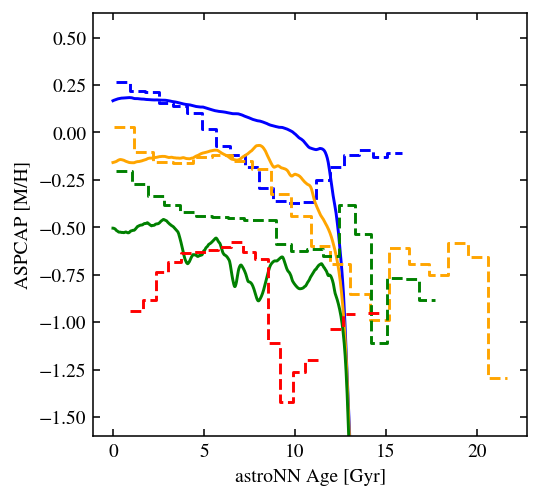

In [56]:
mw_out = vice.multioutput('milkyway')

fig, ax = plt.subplots()

colors = ['b', 'orange', 'g', 'r', 'k']
for i, z in enumerate([4, 8, 12, 16]):
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)][['ASTRONN_AGE', 'M_H']]
    # Bin by age
    ages, age_bins = pd.cut(data_zone['ASTRONN_AGE'], 20, retbins=True)
    # Median [M/H] for each age bin
    median = data_zone['M_H'].groupby(ages).median()
    # Plot median [M/H]
    ax.plot(np.repeat(age_bins, 2)[1:-1], np.repeat(median, 2), linestyle='--', color=colors[i])
    
    # Import VICE zone
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback']), vice_hist['[fe/h]'], color=colors[i])

ax.set_ylim((-1.6, None))
ax.set_xlabel('astroNN Age [Gyr]')
ax.set_ylabel('ASPCAP [M/H]')

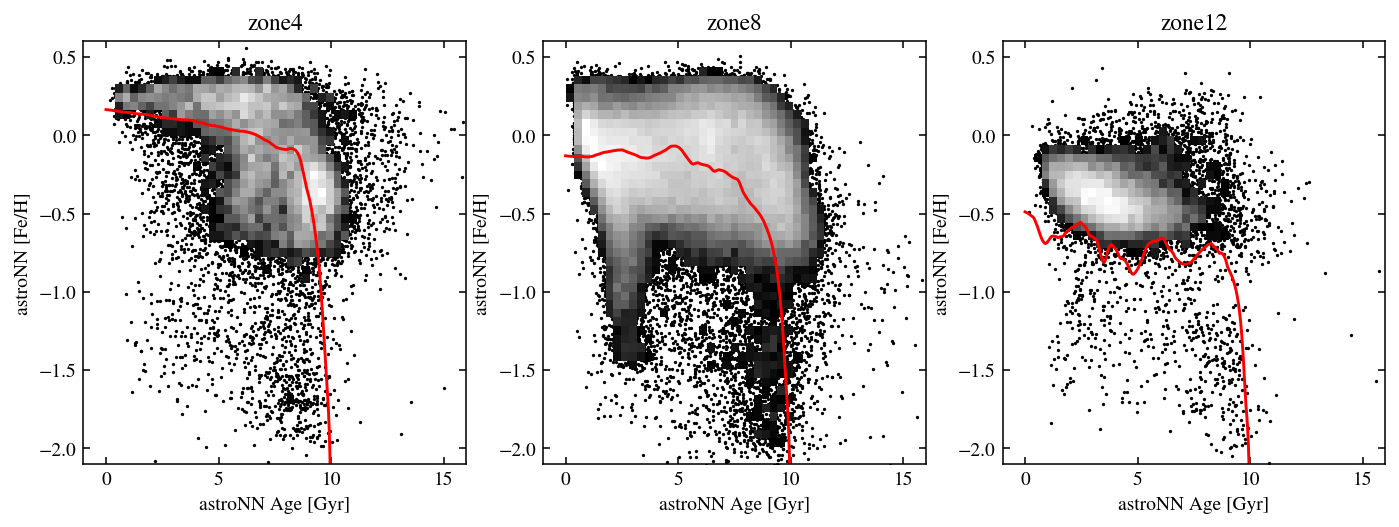

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

mw_out = vice.output('milkyway')
for i, z in enumerate([4, 8, 12]):
    ax = axs[i]
    xlim = (-1, 16)
    ylim = (-2.1, 0.6)
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['ASTRONN_FE_H'], xlim=xlim, ylim=ylim)
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:1001]) - 3.2, vice_hist['[fe/h]'][:1001], color='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('astroNN Age [Gyr]')
    ax.set_ylabel('astroNN [Fe/H]')
    ax.set_title(r'%s$\leq r <$%s kpc' % (z, z+1))
plt.savefig('zone_comp.png', dpi=140)
plt.show()

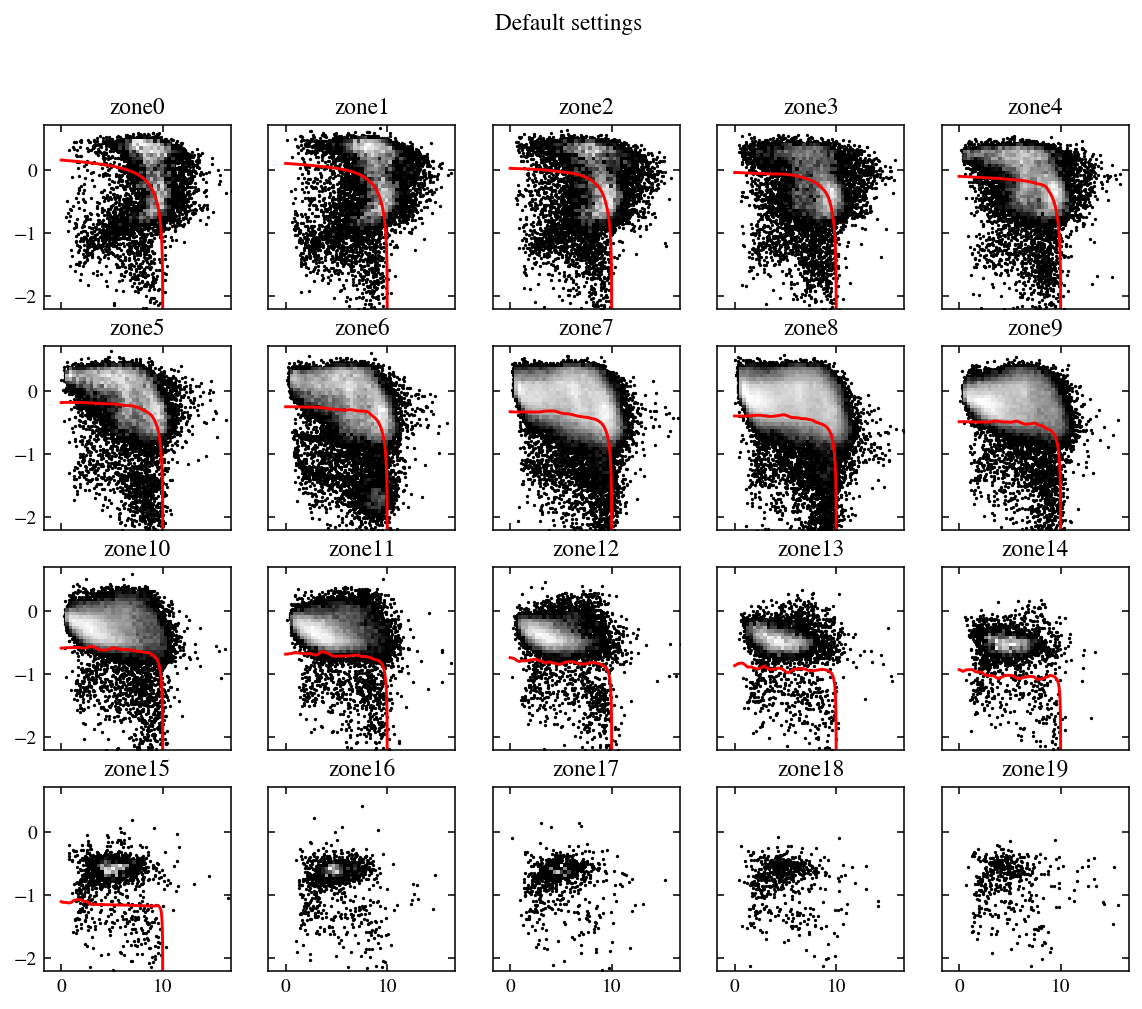

In [96]:
nzones = 20
ncols = 5
nrows = int(np.ceil(nzones / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2), sharex=True, sharey=True)

xlim = (-1, 16)
ylim = (-2.1, 0.6)
# Horizontal offset for VICE results; original was run for 13.2 Gyr
vice_offset = -3.2 # Gyr
vice_end = int(vice_offset * 100)

mw_out = vice.output('milkyway')
for z in range(nzones):
    ax = axs[int(z/ncols), z % ncols]
    # Plot age vs [M/H] data
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['M_H'], xlim=xlim, ylim=ylim)
    # Plot VICE ISM metalliticy predictions vs lookback time
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:vice_end]) + vice_offset, 
            vice_hist['[m/h]'][:vice_end], color='r')
#     ax.set_xlabel('Age [Gyr]')
#     ax.set_ylabel('[Fe/H]')
    ax.set_title(vice_zone.name)
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)
fig.suptitle('Default settings')
plt.show()  

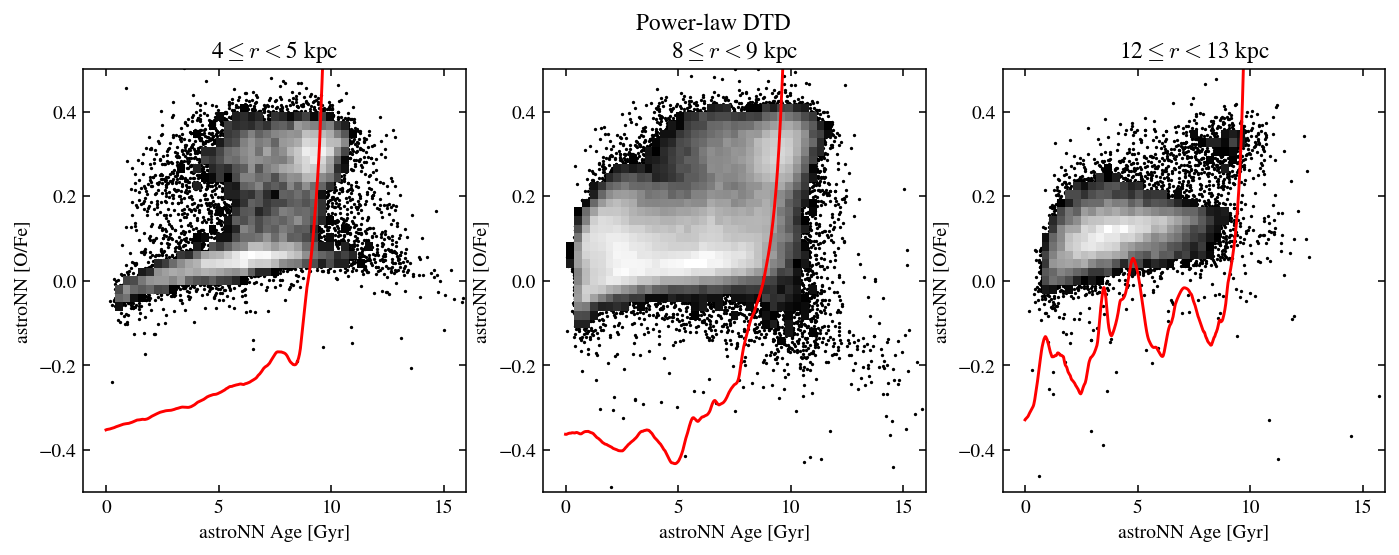

In [93]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

mw_out = vice.output('milkyway')
for i, z in enumerate([4, 8, 12]):
    ax = axs[i]
    xlim = (-1, 16)
    ylim = (-0.5, 0.5)
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['ASTRONN_O_FE'], xlim=xlim, ylim=ylim)
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:1001]) - 3.2, vice_hist['[o/fe]'][:1001], color='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('astroNN Age [Gyr]')
    ax.set_ylabel('astroNN [O/Fe]')
    ax.set_title(r'%s$\leq r <$%s kpc' % (z, z+1))
fig.suptitle('Power-law DTD')
plt.show()

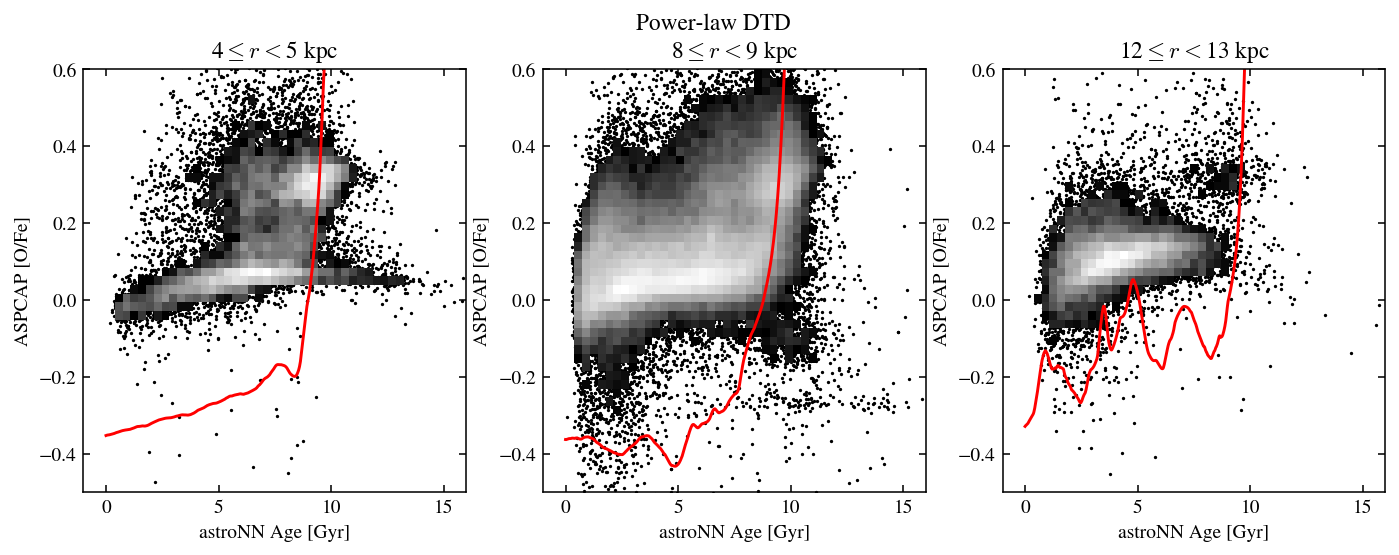

In [92]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
xlim = (-1, 16)
ylim = (-0.5, 0.6)

mw_out = vice.output('milkyway')
for i, z in enumerate([4, 8, 12]):
    ax = axs[i]
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['O_FE'], xlim=xlim, ylim=ylim)
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:1001]) - 3.2, vice_hist['[o/fe]'][:1001], color='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('astroNN Age [Gyr]')
    ax.set_ylabel('ASPCAP [O/Fe]')
    ax.set_title(r'%s$\leq r <$%s kpc' % (z, z+1))
fig.suptitle('Power-law DTD')
plt.show()

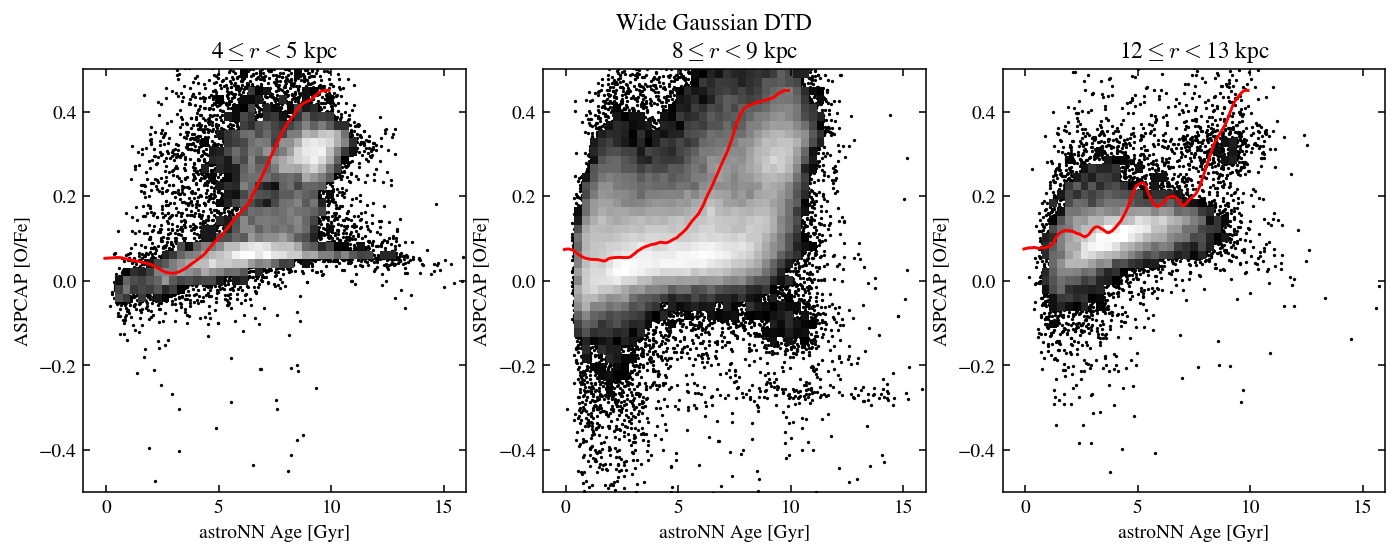

In [94]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

mw_out = vice.output('mw_wide')
for i, z in enumerate([4, 8, 12]):
    ax = axs[i]
    xlim = (-1, 16)
    ylim = (-0.5, 0.5)
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['O_FE'], xlim=xlim, ylim=ylim)
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:201]) - 2.5, vice_hist['[o/fe]'][:201], color='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('astroNN Age [Gyr]')
    ax.set_ylabel('ASPCAP [O/Fe]')
    ax.set_title(r'%s$\leq r <$%s kpc' % (z, z+1))
fig.suptitle('Wide Gaussian DTD')
plt.show()

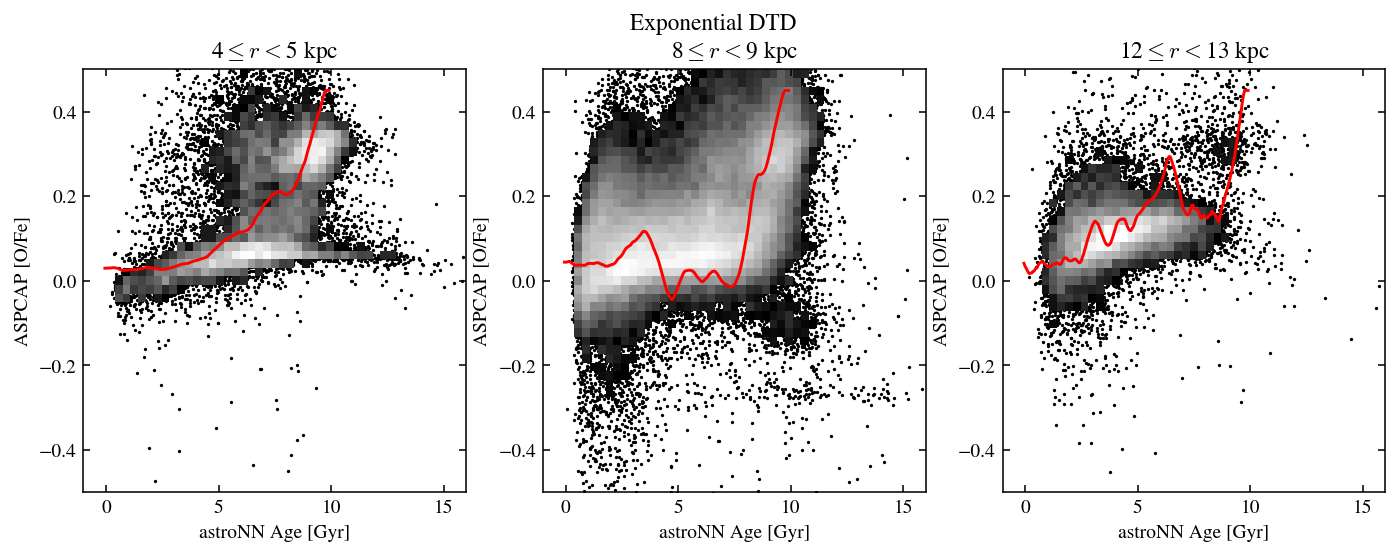

In [95]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

mw_out = vice.output('mw_exp')
for i, z in enumerate([4, 8, 12]):
    ax = axs[i]
    xlim = (-1, 16)
    ylim = (-0.5, 0.5)
    data_zone = data[(data['ASTRONN_GALR'] >= z) & (data['ASTRONN_GALR'] < z+1)]
    scatter_hist(ax, data_zone['ASTRONN_AGE'], data_zone['O_FE'], xlim=xlim, ylim=ylim)
    vice_zone = mw.zones[z]
    vice_hist = mw_out.zones[vice_zone.name].history
    ax.plot(np.array(vice_hist['lookback'][:201]) - 2.5, vice_hist['[o/fe]'][:201], color='r')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel('astroNN Age [Gyr]')
    ax.set_ylabel('ASPCAP [O/Fe]')
    ax.set_title(r'%s$\leq r <$%s kpc' % (z, z+1))
fig.suptitle('Exponential DTD')
plt.show()

In [ ]:
mw_ = vice.milkyway(name='mw_high_eta', N=2e5, zone_width=1.0)
mw_exp.RIa = 'exp'
mw_exp.tau_ia = 1.5
mw_exp.dt = 0.05
out = mw_exp.run(np.linspace(0, 12.5, 251), capture = True)